# Data 330 Applied Time Series Analysis - Lab 2

Katherine Lannen

last edited: 2021-04-09

***

## 1. Introduction  

This lab explores the concept of outliers and two methods of outlier identification, Peirce's Criterion and Minimum Covariance Determinant. This lab will also go through the process of implementing and using an outlier identification method, Peirce's Criterion, to locate the outliers in respect to a linear model of the incoming shortwave radiation (SWin) and the net ecosysytem exchange (NEE) from FLUXNET's 2015 dataset for May, 2002. 

### 1.1 Outliers

Outliers are observations that lie an abnormal distance away from other values in a sample of the population.$^{[11]}$ While this is the general definition of an outlier, outliers for each dataset are defined by the context of the data and the outlier identification method chosen. One of the most common outlier identification methods is using the interquartile range (IQR) of a sample. In this method outliers are defined as observations that are less than the first quartile by 1.5 or are greater than the third quartile by 1.5.$^{[11]}$

Outliers can be found in raw datasets, though not all raw datsets will have outliers. Certain types of data are more likely to have outliers than others so the context of it is crucial. The more the data relies on human elements or a group of instruments for its collection, the more likely the data is to have outliers. Though this is a good rule of thumb, it may not always be the case. Thus, it is critical to research the type of data being analyzed along with how the specific dataset was collected and processed to determine the likelihood of outliers in that case. These outliers can occur naturally and are called novelties when this is the case, but they can also be the result of some sort of error.$^{[9]}$ The two most common being human and instrument errors as referrenced earlier.$^{[9]}$ 

An example of an outlier due to human error would be in the case of doing an experiment with a dilute acid and different types of metals and timing how long it takes for a reaction to occur in seconds, it is expected that more reactive a metal is the less amount of time it takes to react. However, in this case when the person conducting the experiment writes down the number of seconds for one of the reactive metals, they put the decimal place in the wrong position increasing the number of seconds recorded for this metal type in this trial. While this may not occur for the rest of the trials, the averaged number of seconds for this metal type is higher as a result, potentially giving the wrong conclusion about the relationship between metal types. If this outlier is excluded, however, the expected relationship can be seen. 

Outliers are an important factor to look at when analyzing and studying a dataset for multipile reasons. The cause of an outlier can indicate larger problems with the dataset and how it was collected or processed, and, in the case of a large issue, raising questions on the validity and usability of the dataset. For example, if is found that numerous outliers are in the dataset due to human error in the reporting processes, clarifying those processes and determining the amount of the data that could be affected would be critical to figuring out how to proceed. In certain cases it may be better to try and recollect the data, in others the methodologies may need to be altered and the type of conclusions limitted. If there are not larger problems with the dataset, outliers are still important as they can skiew/bias results in a certain direction or can violate assumptions made about the data and the methods that can be applied. In this scenario removing outliers prevents this bias and allows the methods to continue being used. Whenever outliers are removed, the process of doing so should be documented and mentioned when describing the results. However, whether outliers should be removed or included needs to be debated when those outliers are novelties. As these outliers occurred naturally it could be telling of a trend or an indication of something else. Studying these closer could give more insight on a topic, but it could also be out of scope of the focus of the analysis. As such, the context of the dataset, the cause of the outliers, and the desired result of the analysis all need to be considered to determine on a case by case basis whether to remove or include outliers. This consideration should be done for all outliers, though especially in the case of novelties, as it is debated on whether outliers should be included or excluded in analysis and there are benefits to each side.

### 1.2 Outlier Identification Methods

#### 1.2.1 Peirce's Criterion

Peirce's Criterion is a robust, statistical method for removing outliers from datasets that can find multiple outliers in one run and is repeatable in that for the same data, the same outliers are found. This method comes from Benjamin Peirce's 1852 paper, "Criterion for the Rejection of Doubtful Observations." Peirce's criterion takes in three inputs: the total number of observations, the number of outliers expected, and the number of unkowns the model is predicting. From those three inputs the method determines the maximum deviation expected within the dataset, any deviation beyond that amount is considered to be an outlier. Unlike most other outlier identification methods the values of the data is not taken into account when calculating the threshold of what does and does not count as outliers. This maximum deviation expected is multiplied by the mean squared error and then compared against the squared error of each observation in the dataset to see if it is smaller, in which case that observation is an outlier. This process of calculating the maximum deviation and comparing the result to identify outliers is repeated, increasing the number of outliers expected by one each time until the number of outliers found is less than that which is expected.


#### 1.2.2 Minimum Covariance Determinant (MCD)

The minimum covariance determinant (MCD) algorithm is an outlier identification methods focused on identifying outliers in multivariate distributions so that observations that are outliers given relationship between variables can be identified in addition to those that are outliers within an individual variable.$^{[10]}$ MCD is a highly robust estimator of multivariate location and scatter, for which the fast algorithm is available and used in practice due to the computational expense of the exact MCD.$^{[10,2]}$ This fast MCD algorithm was introduced in 1999, while the original MCD was introduced in 1984. MCD has since been used to develop other robust multivariate techniques and continues to be used as a building block of more techinques.$^{[2]}$ 

The main properties of MCD include affine equivariance, breakdown value, and influence function.$^{[2]}$ The general idea of the algorithm is that a robust estimate of the multivariate mean and covariance are calculated by searching for the subset of data points with a minimum determinant of the covariance matrix, relying on the Mahalanobis Distance (MD). Once this localized minimum of the determinant of the covariance is found the algorithm is repeated for some maximum number of random subsets until the MCD-robust parameter estimates are calculated and then used to determine the threshold which can be used to identify outliers.$^{[10]}$  

#### 1.2.3 Peirce's Criterion vs. Minimum Covariance Determinant (MCD)

Minimum Covariance Determinant (MCD) and Peirce's Criterion have many similarities. Both are able to find multiple outliers at once, able to handle multivariate data, and are robust. However, Peirce's criterion is a less computationally expensive algorithm than MCD and does not require a fast version of the algorithm for it to be run. Both still are solutions that loop through different options to come up with a final threshold to which the values are then compared and outliers identified, but MCD has two items it loops on instead of just the one for Peirce's Criterion. On the other hand, MCD can be used for more than just identifying outliers and has become the basis of other robust multivariate techniques and is very good in cases of finding outliers in cases of relationships between one or more variables. Both methods are effective and good options, but Peirce's criterion is simpler to implement and is less expensive when the added benefits of MCD is not needed.

### 1.3 FLUXNET and the FLUXNET 2015 dataset

FLUXNET is a global network of towers that combines data collected from regional flux networks across the world. Regional flux networks are composed of multiple individual towers called a Fluxtower. These Fluxtowers collect data on, "the fluxes of scalars (e.g., CO2, CH4, water vapor) and energy (e.g., sensible, latent heat) between the biosphere and atmosphere", along with, "continuous measurements of ancillary physical variables (e.g., air temperature, precipitation, radiation) acquired from a large number of sensors at high temporal resolution".$^{[3]}$ While the FLUXNET project was started around 1997 with the support of the  National Aeronautics and Space Administration (NASA), it is now hosted and led by the University of California, Berkeley and Lawrence Berkeley National Laboratory. As of February, 2017 there were 914 registered sites across the various regional networks.$^{[4]}$ Each of these registered sites can designate how and if they want to share the data that is collected at that location for each year at that site.

There has been multiple attempts of synthesizing and publicizing the data contained within FLUXNET, the most recent of which being the FLUXNET 2015 dataset. The FLUXNET 2015 dataset includes over 1,500 site-years of data from 212 sites with the values of the fluxes being measured on a half hourly basis. $^{[5]}$ The full version of the dataset includes over 200 variables while the subsetted version only contains those variables that are most likely to be used by those utilizing the dataset.

This lab will only focus on the subsetted version of the FLUXNET 2015 dataset for May, 2002. 







## 2. Methods

### 2.1 Loading the Data

As mentioned in the introduction, the dataset that will be used is the FLUXNET 2015 dataset, specifically the data for the month of May in 2002.$^{[6]}$ This dataset will be read into a dataframe directly from the online csv file, the code and comments corresponding to this were taken from the Applied Time Series Analysis: Course Notebook - Student Copy Lesson 2.$^{[1]}$ 

The first 5 rows in the entire dataframe are displayed below, however, only two columns of this dataframe will be used in the rest of the lab. The first column being NEE_VUT_REF, the net ecosystem exchange (NEE) or the amount of carbon released or absorbed into our atmosphere which is in $\mu mol \ CO_2 m^{-2}s^{-1}$.$^{[1]}$  The second column of interest is SW_IN_F which represent the incoming shortwave radiation (SWin) or the energy received from the sun which is in $\mu mol \ m^{-2}s^{-1}$.$^{[1]}$ 

In [2]:
# Read data into a data frame
flux.url <- "https://ds-wm.github.io/course/atsa/data/FLX_US-Goo_FLUXNET2015_SUBSET_HH_2002-05_1-4.csv"
df <- read.csv(flux.url)

In [3]:
head(df, 5)

,TIMESTAMP_START,TIMESTAMP_END,TA_F,TA_F_QC,SW_IN_POT,SW_IN_F,SW_IN_F_QC,LW_IN_F,LW_IN_F_QC,VPD_F,⋯,RECO_DT_VUT_REF,RECO_DT_VUT_25,RECO_DT_VUT_50,RECO_DT_VUT_75,GPP_DT_VUT_REF,GPP_DT_VUT_25,GPP_DT_VUT_50,GPP_DT_VUT_75,RECO_SR,RECO_SR_N
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,2.00205e+11,2.00205e+11,25.050,2,0,0,2,372.228,2,9.897,⋯,2.58709,2.17306,2.58709,3.31673,0,0,0,0,-9999,-9999
2,2.00205e+11,2.00205e+11,24.745,2,0,0,2,372.228,2,9.482,⋯,2.57926,2.16648,2.57926,3.30669,0,0,0,0,-9999,-9999
3,2.00205e+11,2.00205e+11,24.439,2,0,0,2,372.228,2,9.068,⋯,2.57136,2.15984,2.57136,3.29656,0,0,0,0,-9999,-9999
4,2.00205e+11,2.00205e+11,24.134,2,0,0,2,372.228,2,8.653,⋯,2.56344,2.15319,2.56344,3.28640,0,0,0,0,-9999,-9999
5,2.00205e+11,2.00205e+11,23.828,2,0,0,2,372.228,2,8.239,⋯,2.55544,2.14647,2.55544,3.27616,0,0,0,0,-9999,-9999


### 2.2 Fit the Linear Model

In theory more energy from the sun supports for more vegetation, which in turn, absorbs more carbon from the atmosphere thus there is a theoretical linear relationship between NEE and SWin. To produce a linear model with this theory in mind, the observation data of SWin will fitted against the observation data of NEE using the ordinary least squares method is achieved in base R with the lm function. For this lab the dataset will be used as is instead of filtering out values of SWin and NEE that are not true observations.

The code and the explanation of this section was taken/paraphrased from the Applied Time Series Analysis: Course Notebook - Student Copy Lesson 2.$^{[1]}$

In [4]:
lin.mod <- lm(df$NEE_VUT_REF ~ df$SW_IN_F)

In [5]:
summary(lin.mod)


Call:
lm(formula = df$NEE_VUT_REF ~ df$SW_IN_F)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.0382  -1.2748   0.5612   2.0835   9.4803 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.495061   0.121450   12.31   <2e-16 ***
df$SW_IN_F  -0.014301   0.000297  -48.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.716 on 1485 degrees of freedom
Multiple R-squared:  0.6096,	Adjusted R-squared:  0.6093 
F-statistic:  2318 on 1 and 1485 DF,  p-value: < 2.2e-16


### 2.3 Peirce's Criterion

Please refer to section 1.2.1 in this notebook for a summary of Peirce's Criterion and what this outlier identification method does and how it accomplishes it. This section of the lab will focus on how Peirce's Criterion can be implemented in R as a function.

Name: peirce_criterion

Inputs: 
- int, total number of observations (N)
- int, number of outliers to be removed (n)
- int, number of model unknowns (e.g., regression parameters) (m)

Returns: returns a double, the squared maximum error deviation, $x^2$

Features: Calculates and returns Peirce's Criterion, $x^2$

The script for the function along with the comments corresponding to it was taken from the peirce_dev function's R implementation on the Perice's Criterion wikepedia page.$^{[7]}$

In [6]:
peirce_criterion <- function(N, n, m) {
    # Check number of observations:
    if (N > 1) {
       # Calculate Q (Nth root of Gould's equation B):
       Q = (n^(n/N) * (N-n)^((N-n)/N))/N
       # Initialize R values:
       Rnew = 1.0
       Rold = 0.0
       while (abs(Rnew-Rold) > (N*2.0e-16)) {
           # Calculate Lamda (1/(N-n)th root of Gould's equation A'):
           ldiv = Rnew^n
           if (ldiv == 0) {
              ldiv = 1.0e-6
           }
           Lamda = ((Q^N)/(ldiv))^(1.0/(N-n))
           # Calculate x-squared (Gould's equation C):
           x2 = 1.0 + (N-m-n)/n * (1.0-Lamda^2.0)
           # If x2 goes negative, set equal to zero:
           if (x2 < 0) {
              x2 = 0
              Rold = Rnew
           } else {
              # Use x-squared to update R (Gould's equation D):
              # NOTE: error function (erfc) is replaced with pnorm (Rbasic):
              # source:  http://stat.ethz.ch/R-manual/R-patched/library/stats/html/Normal.html
              Rold = Rnew
              Rnew = exp((x2-1)/2.0)*(2*pnorm(sqrt(x2)/sqrt(2)*sqrt(2), lower=FALSE))
           }
       }
    } else {
       x2 = 0
    }
    return(x2)
}

### 2.4 Identifying Outliers

This section creates a function that identifies all outliers in the May 2002 time series based on a linear model fitting SWin against NEE using the Peirce's Criterion implementation in 2.3. 

Name: outlier_location

Inputs: 
- vector of doubles, the independent variable (x)
- vector of doubles, the dependent variable (y)
- int, number of model unknowns (e.g., regression parameters) (m) *optional: default is m = 2

Returns: returns a logical vector which is TRUE at indicies containing outliers

Features: Calculates the mean squared error of the model from the model's residuals and finds the Peirce's Criterion ($x^2$) of the model by altering the number of outliers expected until the number of outliers found is lower. Finally it creates and returns a logical vector of the indicies of outliers (i.e. where the residuals were greater than $x^2$)

Depends: peirce_criterion() - calculates Peirce's Criterion ($x^2$)

The script for this function is based off a python implementation that can be found in Appedix A.2 of the gepisat documentation.$^{[8]}$

In [7]:
outlier_location <- function(x, y, model, m = 2) {
  if (length(x) > 3 & length(y) > 3){
    se <- model$residuals**2.0
    sse <- sum(se)
    mse <- sse/(length(y) - 3.0)
    x2 <- peirce_criterion(length(y), 1, m)
    d2 <- mse*x2
    n_idx <- se > d2
    n_found <- sum(n_idx)
    if (n_found == 0){
      x2 <- peirce_criterion(length(y), 2, m)
      d2 <- mse*x2
      n_idx <- se > d2
      n_found <- sum(n_idx)
    }
    num_outliers_expected <- 1
    while(num_outliers_expected <= n_found){
      num_outliers_expected <- num_outliers_expected + 1
      x2 <- peirce_criterion(length(y), num_outliers_expected, m)
      d2 <- mse*x2
      n_idx <- se > d2
      n_found <- sum(n_idx)
    }
    return (n_idx)
  }
}

To get the location of all outliers in the May 2002 time series based on a linear model fitting SWin against NEE, the outlier_location function defined earlier is called. As SWin is the independent variable and NEE is the dependent variable, that is the order the respective columns in the dataframe are put into the parameters of the function. The next parameter given is the linear model itself that was fitted in 2.2. As the default value of the number of model unknowns (e.g., regression parameters) is 2 it was unnecessary to change its value.

To get the total number of outliers identified the sum of the logical vector returned from the outlier_location function, outliers, was calculated. The sum of the logical vector works as FALSE evaluates to 0s and TRUE evaluates to 1s.

In [8]:
# Use outlier_location function to find the location of all outliers
# outliers will be used in the results section, 4.1, when plotting to filter
# the outliers so they can be plotted separately
outliers <- outlier_location(df$SW_IN_F, df$NEE_VUT_REF, lin.mod)

# Get the total number of outliers found in the dataset
total_num_outliers <- sum(outliers)

## 3. Results

### 3.1 SWin versus NEE Scatter plot

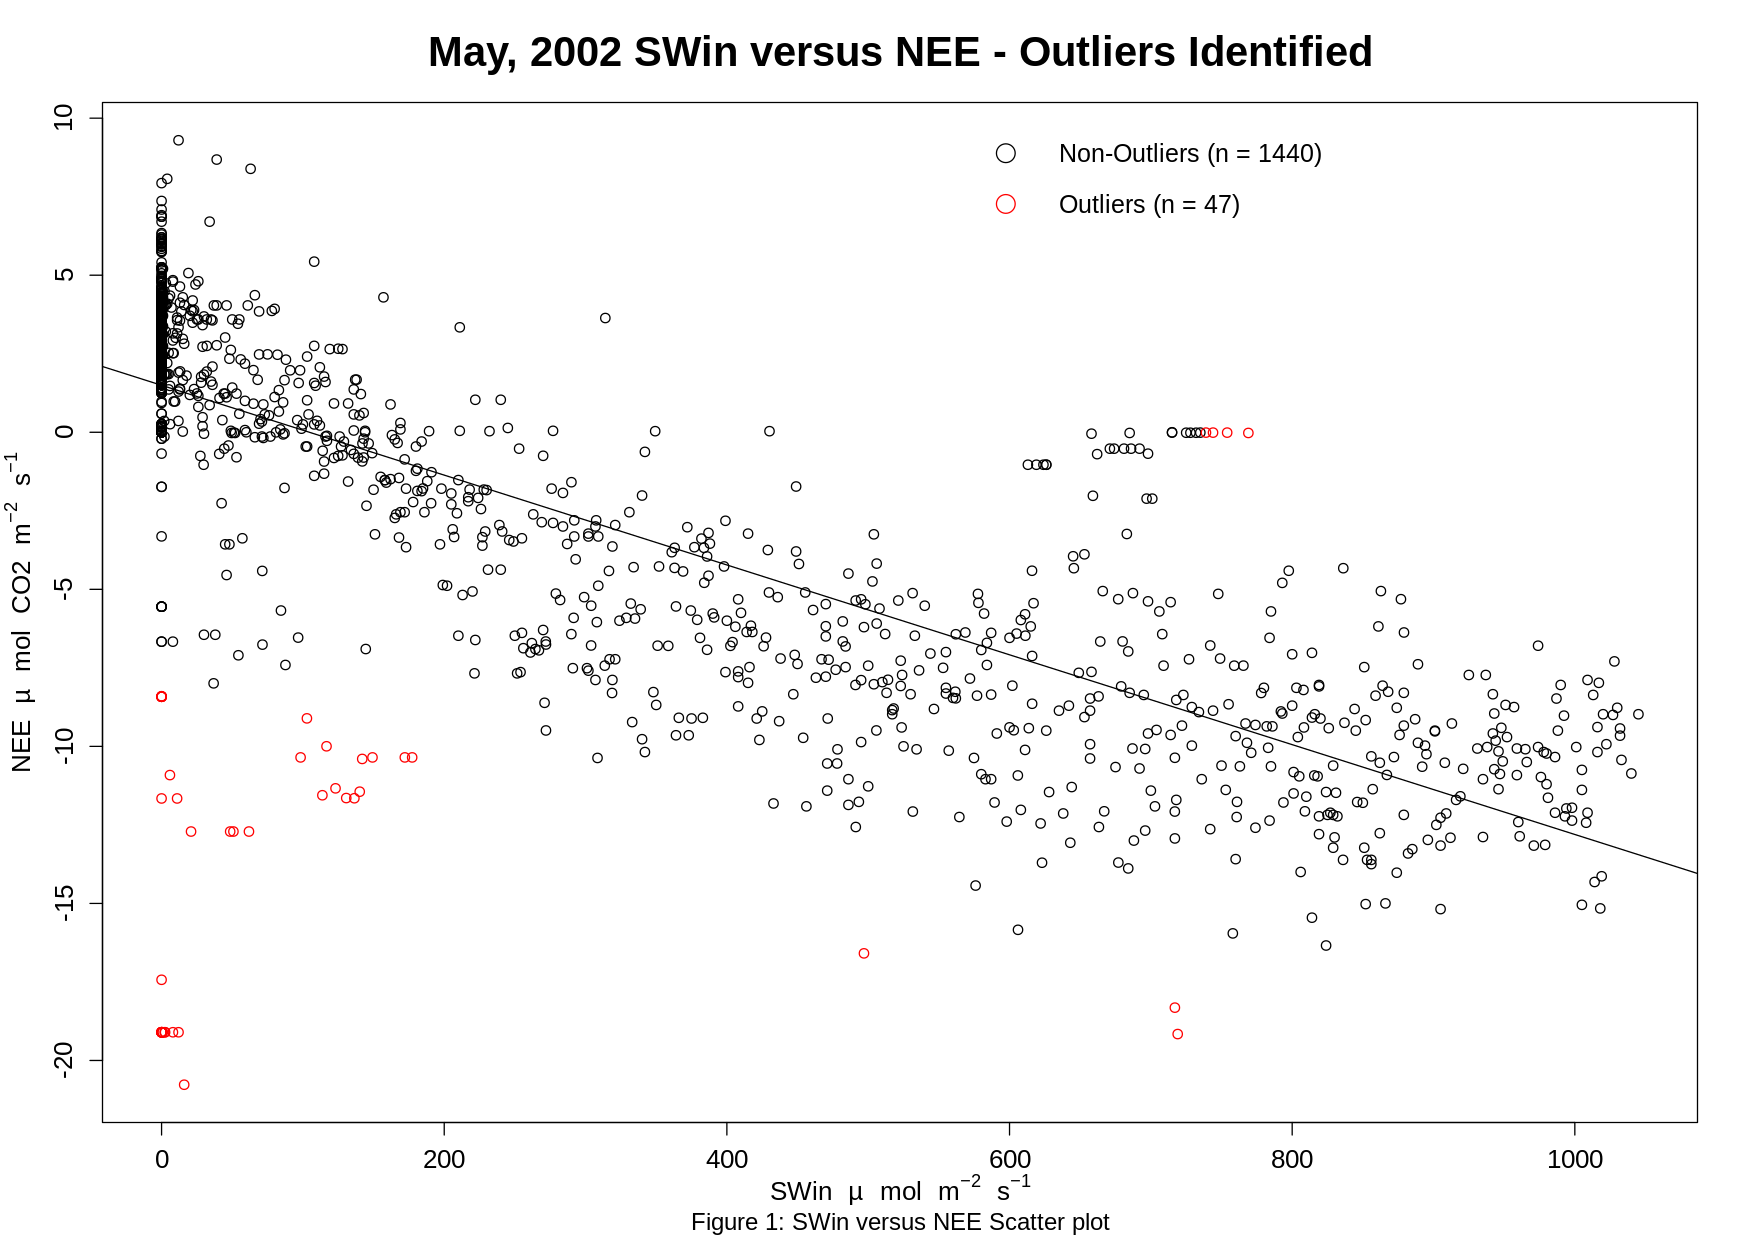

In [9]:
options(repr.plot.width=14, repr.plot.height=10, repr.plot.res = 125)
par(cex.main =  2, cex.lab = 1.25, cex.axis = 1.25, cex.sub = 1.15)
plot(df$SW_IN_F[!outliers], df$NEE_VUT_REF[!outliers],
     xlim = c(min(df$SW_IN_F),max(df$SW_IN_F)), ylim = c(min(df$NEE_VUT_REF),max(df$NEE_VUT_REF)),
     xlab = bquote("SWin" ~ mu ~ "mol" ~ m^{-2} ~ s^{-1}), ylab = bquote("NEE" ~ mu ~ "mol" ~ "CO2" ~ m^{-2} ~ s^{-1}), 
     main = "May, 2002 SWin versus NEE - Outliers Identified", sub = "Figure 1: SWin versus NEE Scatter plot", mgp = c(2.5, 1, 0))
points(df$SW_IN_F[outliers], df$NEE_VUT_REF[outliers], col = "red")
legend("topright", legend=c(paste("Non-Outliers (n = ",length(df$SW_IN_F[!outliers]),")",sep = ""), paste("Outliers (n = ",length(df$SW_IN_F[outliers]),")", sep = "")),
       col=c("black", "red"), pch = 1, bty = "n", pt.cex = 2, cex = 1.2, 
       text.col = "black", horiz=FALSE)
abline(lin.mod)

The Figure above, Figure 1, shows the relationship between the net ecosystem exchange (NEE) and the incoming shortwave radiation (SWin) for all observations across various points in time in May, 2002 from the FLUXNET's 2015. These two variables demonstrate a negative linear relationship as when the value of SWin increases, the value of NEE decreases. This graph separates out the observations into those that are outliers, the red points, and those that are not, the black points. The axis labels states the variable and the units in which it is being measured and the legend clarifies the groupings and the number of observations belonging to each grouping. The line in the middle of the points is the linear model created from using SWin to predict NEE. The outliers identified by Peirce's criterion have almost the same distance apart from the line generated by the linear regression model on both sides.

### 3.2 Number of Outliers in the dataset

In [10]:
cat(paste("Total Number of Outliers in the dataset:",total_num_outliers))

Total Number of Outliers in the dataset: 47

## 4. Discussion and Conclusions 

In this lab, Peirce's criterion was used to identify and then remove outliers from the May, 2002 FLUXNET 2015 dataset based on the linear relationship between the net ecosystem exchange (NEE) and the incoming shortwave radiation (SWin). The relationship between NEE and SWin was expected to be linear because in theory more energy from the sun supports for more vegetation, which in turn, absorbs more carbon from the atmosphere. Using the linear model where the observation data of SWin was fitted against that of NEE using the ordinary least squares method, outliers were then identified using the peirce_criterion and outlier_location functions. 

The peirce_criterion function's implementation was taken from the R implementation of the function on Peirce's criterion Wikipedia page.$^{[7]}$ The outlier_location function was translated and modified from the python implementation found in the Appedix A.2 of the GePiSaT documentation.$^{[8]}$ Calling the outlier_location function while passing in the x and y data columns along with the linear model resulted in a logical vector where the index of TRUE values were the locations of outliers. In the lab above, the outliers were never truly removed, only filtered in and out based on the logical values as desired. To truly remove these values, all one would have to do it set the column equal to the filtered version of it. 

The total number of outliers found was 47 while the total number of observations were 1487. These outliers can be identified from the rest of the observations in Figure 1, section 3.1 in this lab. This graph also shows a negative linear relationship between NEE and SWin which was the result expected as when the value of SWin is higher, the value of NEE is lower. The higher value of SWin corresponds with more energy from the sun being able to support more vegetation and the lower value of NEE indicates more carbon being absorbed from the atmosphere than it being emitted. With this understanding of the relationship, some of the outliers identifyed make sense in the reason they were identified as such. For instance in the bottom left location of the figure, there is a low amount of SWin but there is also a low amount of NEE which does not follow the expected relationship.

In general, the methods worked as expected and were relatively easier to implement especially as there were references to work off of (or in the case of the peirce_criterion function, the implementation was provided). The only thing that was necessary was walking through the python implementation in the gepisat documentation to ensure that the function was understood before translating it into R. After doing so the implementation process went smoothly. The only other slight challenge was doing a bit more research into the creation of legends in R so that the figure could be nicely formatted. 

Overall, Peirce's criterion was a simple, robust outlier identification method that could be implemented in a script and be used to find outliers in linear relationship between two variables.




## 5. References 

1. Davis, T. (2021). Applied Time Series Analysis: Course Notebook - Student Copy Lesson 2 [ipynb file]. William & Mary, Williamsburg VA. Retrieved from https://colab.research.google.com/drive/1AtH8dXyTebnm4fl9Amx0o4s9VZ6Wzsqk?usp=sharing#scrollTo=cFE-C5JSr7Go.
2. Hubert, M, Debruyne, M, Rousseeuw, PJ. Minimum covariance determinant and extensions. WIREs Comput Stat. 2018;10:e1421. https://doi.org/10.1002/wics.1421
3. Lawrence Berkeley National Laboratory (n.d.). About Data, FLUXNET. Sept. 2020. https://fluxnet.org/data/
4. Lawrence Berkeley National Laboratory (n.d.). History of FLUXNET, FLUXNET. https://fluxnet.org/about/history/ 
5. Lawrence Berkeley National Laboratory (n.d.). FLUXNET2015 Dataset, FLUXNET. https://fluxnet.org/data/fluxnet2015-dataset/
6. Pastorello, G., Trotta, C., Canfora, E. et al. The FLUXNET2015 dataset and the ONEFlux processing pipeline for eddy covariance data. Sci Data 7, 225 (2020). https://doi.org/10.1038/s41597-020-0534-3
7. Peirce's criterion. (n.d.). peirce_dev source code [R] In Wikipedia. Retrieved March 30, 2021, from https://en.wikipedia.org/wiki/Peirce%27s_criterion#R_code
8. Prentice, I. C., Davis, T. W., Gilbert, X. M., Evans, B. J., Wang, H., &amp; Keenan, T. F. (2015, March 24). The Global ecosystem Production in Space and Time (GePiSaT) Model of the Terrestrial Biosphere [PDF].
9. Santoyo, Sergio. “A Brief Overview of Outlier Detection Techniques.” Towards Data Science, Medium, 11 Sept. 2017. https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561
10. Sunderland, K.M., Beaton, D., Fraser, J. et al. The utility of multivariate outlier detection techniques for data quality evaluation in large studies: an application within the ONDRI project. BMC Med Res Methodol 19, 102 (2019). https://doi.org/10.1186/s12874-019-0737-5
11. "What are outliers in the data". (n.d.). Engineering Statistics Handbook, NIST SEMATECH https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
